# EECS 678 - Project 2: Shakespeare Classification

Using this (https://www.kaggle.com/kingburrito666/shakespeare-plays) dataset of all the lines from all of Shakespeare's plays, the goal was to classify the player saying a given line. I choose to focus this around predicting the player from only the line and possibly the play. Although the dataset contains the act, scene, and line number, it feels a bit unrealistic to predict the player from this as at that point it could be thought of just memorization of every play. The thought process I had in mind is most people could hear the line "To be or not to be, that is the question" and know that the Hamlet said that line.

To acomplish this, I tried two main approaches. First, using the play with a custom made way to interpret the complexity of a given line by using the average number of characters per word in the line. The other, somewhat more complicated, but more realistic method I used was to using a vector embeding of the lines and try to predict based on that. 

In [1]:
%matplotlib inline

import pandas
import numpy as np
import pickle

def save_model(model, name):
    with open(f"../models/{name}.pkl", 'wb') as f:
        pickle.dump(model, f)

## The Dataset

Here you can see an example of what this dataset looks like. For each line, we have the text of the line, what play it's from, the act screne line number of who said the line.

In [2]:
raw_data = pandas.read_csv('../data/Shakespeare_data.csv')
raw_data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


First, we need to remove all the lines that are act breaks or stage directions. These are all the lines without a player entry.

In [3]:
valid_lines = raw_data.loc[~raw_data['Player'].isnull()].copy()
valid_lines.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


Next, we onehot encode both the play and the players so that those collumns are in a form that is easier to work with for modeling.

In [4]:
from sklearn.preprocessing import LabelBinarizer


play_one_hot = LabelBinarizer().fit_transform(valid_lines.Play).tolist()
valid_lines['Play_One_Hot'] = play_one_hot

valid_lines

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Play_One_Hot
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
8,9,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own children's bl...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
9,10,Henry IV,1.0,1.1.7,KING HENRY IV,"Nor more shall trenching war channel her fields,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
10,11,Henry IV,1.0,1.1.8,KING HENRY IV,Nor bruise her flowerets with the armed hoofs,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
11,12,Henry IV,1.0,1.1.9,KING HENRY IV,"Of hostile paces: those opposed eyes,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
12,13,Henry IV,1.0,1.1.10,KING HENRY IV,"Which, like the meteors of a troubled heaven,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


In [5]:
player_one_hot = LabelBinarizer().fit_transform(valid_lines.Player).tolist()

valid_lines['Player_One_hot'] = player_one_hot

valid_lines

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Play_One_Hot,Player_One_hot
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,9,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own children's bl...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,10,Henry IV,1.0,1.1.7,KING HENRY IV,"Nor more shall trenching war channel her fields,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10,11,Henry IV,1.0,1.1.8,KING HENRY IV,Nor bruise her flowerets with the armed hoofs,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11,12,Henry IV,1.0,1.1.9,KING HENRY IV,"Of hostile paces: those opposed eyes,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
12,13,Henry IV,1.0,1.1.10,KING HENRY IV,"Which, like the meteors of a troubled heaven,","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Here we add the feature I was talking about above of the number of characters per word. Below is the distribution of this new feature. 

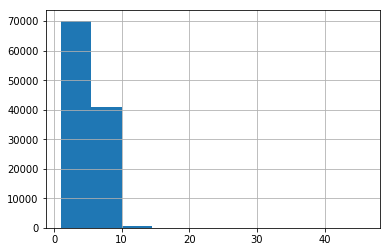

In [6]:
valid_lines['Line_Density'] = valid_lines.apply(lambda x: len(x['PlayerLine']) / len(x['PlayerLine'].split(' ')), axis=1)
valid_lines['Line_Density'].hist()

## Modeling based on the Line Density feature

Here we begin attempting to create models using this engineered feature.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

X = np.array(valid_lines['Play_One_Hot'].tolist())
Z = np.array(valid_lines['Line_Density'].tolist()).reshape(X.shape[0], 1)

X = np.append(X, Z, 1)

# Sklearn doesn't want the y values to already be one-hot-encoded
y = np.array(valid_lines['Player'].tolist())

X, y = shuffle(X, y)

kf = KFold(n_splits=10)

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = y[train_idx], y[test_idx]

    clf = LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=4).fit(X_train, Y_train)
    
    model_name = f"line_density_logistic_{fold}"
    fold += 1
    save_model(clf, model_name)
    
    print(model_name, clf.score(X_test, Y_test))



line_density_logistic_1 0.22048657868749438
line_density_logistic_2 0.21222730945327228
line_density_logistic_3 0.21725469072627704
line_density_logistic_4 0.22524463596373104
line_density_logistic_5 0.21779333871981327
line_density_logistic_6 0.22057635335308376
line_density_logistic_7 0.22003770535954753
line_density_logistic_8 0.21635694407038333
line_density_logistic_9 0.21940928270042195
line_density_logistic_10 0.22346920452504937


As you can see the results aren't great, but I feel like that should be expected since all the model has to go on is the play and the length of words in a line. I could keep attempting to model with this feature, but it seems like a dead end since I doubt there's really much information to glean from that combination of features.

## Word Embedings

Next, instead of trying to engineer my own meaning of the text, I turned to an existing word embeding model from gensim called FastText. FastText takes the corpus of text and trains a model to embed the words into a high dimensional vector space. You can see an example of what one line translates to in this space.

In [7]:
from gensim.models import FastText

dictionary = []
for line in valid_lines['PlayerLine']:
    dictionary.append(line.replace(',', '').replace('.', '').replace('!', '').split(' '))
    

w2v_model = FastText(sentences=dictionary)
w2v_model.wv[valid_lines.PlayerLine[3]]

array([-3.27095576e-02,  4.25934466e-03,  6.10905923e-02, -1.87415220e-02,
        7.03653470e-02,  1.30790621e-02,  4.41437438e-02, -2.93093473e-02,
        1.29676554e-02,  1.06908455e-01,  7.73718255e-03,  9.42570798e-04,
        1.58660524e-02, -9.34253559e-02,  7.44467229e-03, -6.29469305e-02,
       -2.21692268e-02,  3.29935737e-02,  3.06199901e-02, -3.88047732e-02,
        1.46753443e-02, -5.25452849e-03, -1.19641209e-02,  1.87104084e-02,
       -3.68141234e-02,  4.05376852e-02,  1.64492857e-02,  7.49945045e-02,
       -3.27362865e-02,  4.17615753e-03,  5.59739992e-02,  1.00591360e-02,
        5.53316735e-02, -1.96352657e-02,  5.79764210e-02, -4.64432389e-02,
        2.76474073e-03, -5.32596074e-02,  7.08865467e-03,  9.69255716e-03,
       -2.39157956e-02,  5.66335507e-02,  6.61421195e-02, -3.65264826e-02,
       -3.93236727e-02,  1.24949263e-02, -4.33284119e-02,  5.92310168e-03,
       -4.44372334e-02, -5.28188907e-02,  1.12050651e-02, -6.69187605e-02,
        7.34077767e-02, -

Next, we use these embedings to convert the player lines into vectors.

In [8]:
def vectorize(row):
    return w2v_model.wv[row['PlayerLine']]
    
valid_lines['Vector_Line'] = valid_lines.apply(vectorize, axis=1)
valid_lines['Vector_Line']

3         [-0.032709558, 0.0042593447, 0.061090592, -0.0...
4         [-0.06774469, -0.0068018306, 0.14597847, 0.040...
5         [-0.11017592, 0.02022394, 0.17614476, 0.105781...
6         [-0.0875388, 0.021241823, 0.15695086, 0.074669...
7         [-0.06055718, -0.009997746, 0.18457158, 0.0673...
8         [-0.06731722, 0.005581385, 0.17586993, 0.09980...
9         [-0.057265475, -0.023123113, 0.21110268, 0.074...
10        [-0.08649002, 0.03479142, 0.13431983, 0.070163...
11        [-0.060419366, 0.013288487, 0.10677863, 0.0917...
12        [-0.03766564, -0.051612284, 0.18042782, 0.0633...
13        [-0.078937866, 0.007165595, 0.13598947, 0.0790...
14        [-0.0811247, 0.00663344, 0.18190505, 0.0509614...
15        [-0.07929193, 0.03142618, 0.14068352, 0.108386...
16        [0.004758519, -0.026302205, 0.16414107, 0.0294...
17        [-0.07436237, -0.016032856, 0.18512274, 0.0795...
18        [-0.15461689, 0.018799266, 0.20787951, 0.13475...
19        [-0.06849805, 0.034826316, 0.1

### Logistic Regression

First, I tried to train a logistic regression model over these learned embeddings combined with the source play. You can see the accuracies for each fold below

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

X = np.array(valid_lines['Play_One_Hot'].tolist())
Z = np.array(valid_lines['Vector_Line'].tolist())
X = np.append(X, Z, 1)

# Sklearn doesn't want the y values to already be one-hot-encoded
y = np.array(valid_lines['Player'].tolist())

X, y = shuffle(X, y)
kf = KFold(n_splits=10)

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = y[train_idx], y[test_idx]

    clf = LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=4).fit(X_train, Y_train)
    
    model_name = f"vector_logistic_{fold}"
    fold += 1
    save_model(clf, model_name)
    
    print(model_name, clf.score(X_test, Y_test))


vector_logistic_1 0.22946404524643146
vector_logistic_2 0.23646646916240238
vector_logistic_3 0.22856629859053776
vector_logistic_4 0.22578328395726727
vector_logistic_5 0.22793787593141215
vector_logistic_6 0.22883562258730586
vector_logistic_7 0.23107998922704012
vector_logistic_8 0.23018224257114642
vector_logistic_9 0.22668103061316097
vector_logistic_10 0.2260729035733525


### Random Forest

Next, I tried a random forest classifier with the same features as above and as you can see, the accuracy was signifigantly worse than the logistic regression. Note, the saved models for this model are not included in the repo due to their large side.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

X = np.array(valid_lines['Play_One_Hot'].tolist())
Z = np.array(valid_lines['Vector_Line'].tolist())
X = np.append(X, Z, 1)

# Sklearn doesn't want the y values to already be one-hot-encoded
y = np.array(valid_lines['Player'].tolist())

X, y = shuffle(X, y)

kf = KFold(n_splits=10)

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = y[train_idx], y[test_idx]
    
    rfs = RandomForestClassifier(n_estimators=10, n_jobs=4)
    rfs.fit(X_train, Y_train)
    
    model_name = f"vector_forest_{fold}"
    fold += 1
    save_model(rfs, model_name)
    
    print(model_name, rfs.score(X_test, Y_test))

vector_forest_1 0.171469611275698
vector_forest_2 0.1782027111949008
vector_forest_3 0.1723673579315917
vector_forest_4 0.1745219499057366
vector_forest_5 0.17425262590896848
vector_forest_6 0.18179369781847562
vector_forest_7 0.17407307657778975
vector_forest_8 0.17963910584433074
vector_forest_9 0.17434240057455785
vector_forest_10 0.17606392530077214


### SVM

Finally, I tried a SVM classifier, again you can see the accuracies for each fold below. As with the random forest models, the SVM models were too large to be uploaded to the repo.

In [10]:
from sklearn.svm import SVC

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = y[train_idx], y[test_idx]
    
    svc = SVC(gamma='scale')
    svc.fit(X_train, Y_train)
    
    model_name = f"vector_svm_{fold}"
    fold += 1
    save_model(svc, model_name)
    
    print(model_name, svc.score(X_test, Y_test))

vector_svm_1 0.2207559026842625
vector_svm_2 0.21536942274890025
vector_svm_3 0.21662626806715146
vector_svm_4 0.2128557321123979
vector_svm_5 0.2137534787682916
vector_svm_6 0.22488553730137356
vector_svm_7 0.2210252266810306
vector_svm_8 0.2244366639734267
vector_svm_9 0.2189604093724751
vector_svm_10 0.22508529358951337


## Future Work

As you can see, we don't really get a more accurate model even after using word embedings. In the future, I'd like to either revist how the word embedings are being generated and see if there's an issue there or try using a neural network which is well suited for the high dimensional data such as the word embedings. I would have done more of that work now, but it ended up taking me a long time to get the word embedings to even work in the first place, even though all that remains from that effort is a few lines of code. I had tried using a couple of the different embedings, with some custom parameters, but then found FastText which seemed to solve some of the sparsity problems I was having. I need to spend more time investigating whether the issue lies with the models or with the embedings themselves. 